<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/ElectricMachines_WindingDiagram_lap_fractionalPitch_4Pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Electric Machine Winding Diagrams: Fractional-Pitch Lap Winding 4-Pole</h1></b>

Dr. Bingsen Wang

8/23/2024
</center>

#Python Code
The Python code illustrates the lap winding diagram.

0
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
0


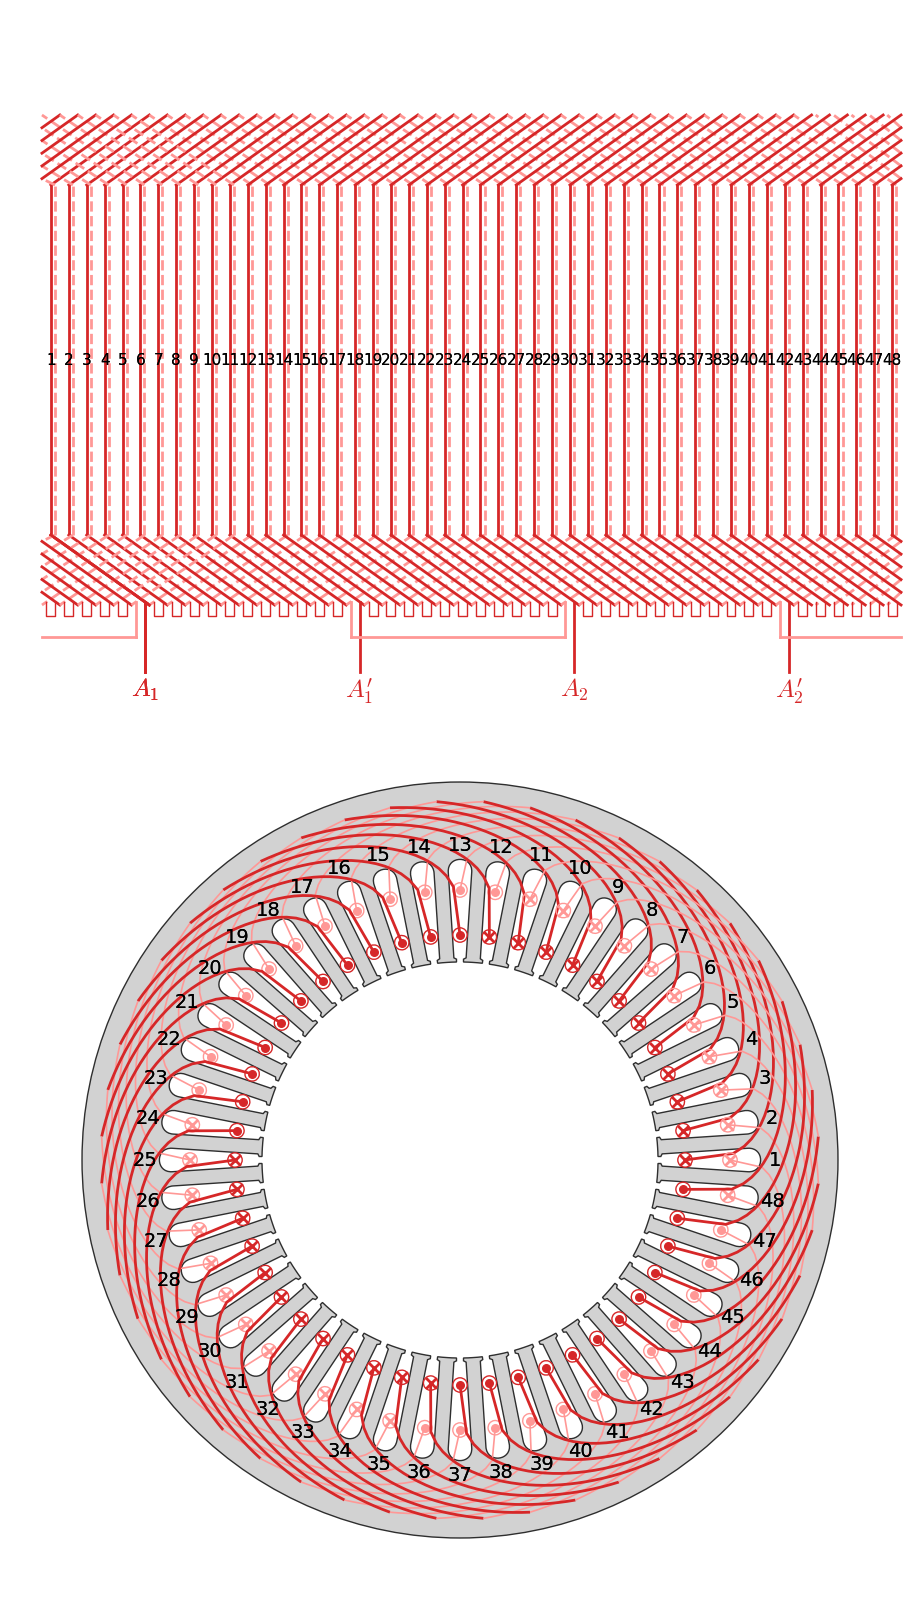

In [3]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array,sqrt,arcsin,conj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc,Circle
from matplotlib import animation,transforms,colors
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return
def re_im(c):
  return list(zip(c.real,c.imag))
def r2d(rad):
  return rad*180/pi

def draw_coil_side(ax,x,y,l,top=True,lw=2,c='k',slotNumber=''):
  plt.axes(ax)
  if top:
    ax.plot([x,x],[y,y+l],c=c,lw=lw)
  else:
    plt.vlines(x+.01,y,y+l,ls='--',color=c,lw=lw)
  ax.text(x,y+l*.5,slotNumber,size=11,ha='center',va='center')
  return

def draw_coil_end_front(ax,x,y,dx,dy,l,ss,pp,ns=48,tlb='',ipcon=False,
                        pn=0,top=True,first=False,last=False,phase_end=False,
                        lw=2,c='k',xmax=10,xmin=-10):
  """
  x,y: meeting point of coil side and coil end front
  dx,dy: coil end front from x,y to x+dx,y+dy
  l: coil side length
  ss: slot spacing in winding diagram
  tlb: terminal label
  pp: pole pitch
  ns: number of slots
  pn: phase number 0,1,2 for a,b,c
  ipcon: inter-pole connection"""
  if top:
    if x+dx>xmax:
      ax.plot([x,xmax],[y,y-dy*(xmax-x)/dx],c=c,lw=lw)
      ax.plot([xmin,xmin+x+dx-xmax],[y-dy*(xmax-x)/dx,y-dy],c=c,lw=lw)
      x0,y0 = xmin+x+dx-xmax-ss/4,y-dy+dy/dx*ss/4
      if first: #start terminal
        ax.plot([x0,x0],[y0,y0-.2*l],c=c,lw=lw)
        ax.text(x0,y0-.21*l,tlb,size=18,c=c,ha='center',va='top')
      else: #inter-coil connection
        ax.plot([x0,x0,x0-ss/2,x0-ss/2],[y0,y0-.1,y0-.1,y0],c=c,lw=lw*.5)
    else:
      ax.plot([x,x+dx],[y,y-dy],c=c,lw=lw)
      x0,y0 = x+dx-ss/4,y-dy+dy/dx*ss/4
      if first: #start terminal
        ax.plot([x0,x0],[y0,y0-.2*l],c=c,lw=lw)
        ax.text(x0,y0-.21*l-.01,tlb,size=18,c=c,ha='center',va='top')
      else: #inter-coil connection
        ax.plot([x0,x0,x0-ss/2,x0-ss/2],[y0,y0-.1,y0-.1,y0],c=c,lw=lw*.5)
  else:
    if x+.01-dx<xmin:
      ax.plot([x+.01,xmin],[y,y-dy*(x-xmin)/dx],'--',c=c,lw=lw)
      ax.plot([xmax,xmax+x+.01-dx-xmin],[y-dy*(x-xmin)/dx,y-dy],'--',c=c,lw=lw)
      x0,y0 = xmax+x+.01-dx-xmin+ss/4,y-dy+dy/dx*ss/4
      if last: #end terminal
        ax.plot([x0,x0],[y0,y0-.1*l-.05*pn],c=c,lw=lw)
        if ipcon: #inter-pole connection
          ax.plot([x0,x0-ss*pp-.01],[y0-.1*l-.05*pn,y0-.1*l-.05*pn],c=c,lw=lw)
    else:
      ax.plot([x+.01,x-dx],[y,y-dy],'--',c=c,lw=lw)
      x0,y0 = x-dx+ss/4,y-dy+dy/dx*ss/4
      if last: #end terminal
        ax.plot([x0,x0],[y0,y0-.1*l-.05*pn],c=c,lw=lw)
        if ipcon: #inter-pole connection
          if x0-ss*pp<xmin:
            ax.plot([x0,xmin],[y0-.1*l-.05*pn,y0-.1*l-.05*pn],c=c,lw=lw)
            ax.plot([x0-ss*pp+ss*ns,xmin+ss*ns],[y0-.1*l-.05*pn,y0-.1*l-.05*pn],c=c,lw=lw)
          else:
            ax.plot([x0,x0-ss*pp],[y0-.1*l-.05*pn,y0-.1*l-.05*pn],c=c,lw=lw)
  return

def draw_coil_end_back(ax,x,y,dx,dy,l,top=True,lw=2,c='k',xmax=10,xmin=-10):
  if top:
    if x+dx>xmax:
      ax.plot([x,xmax],[y+l,y+l+dy*(xmax-x)/dx],c=c,lw=lw)
      ax.plot([xmin,xmin+x+dx-xmax],[y+l+dy*(xmax-x)/dx,y+l+dy],c=c,lw=lw)
    else:
      ax.plot([x,x+dx],[y+l,y+l+dy],c=c,lw=lw)
  else:
    if x+.01-dx<xmin:
      ax.plot([x+.01,xmin],[y+l,y+l+dy*(x-xmin)/dx],'--',c=c,lw=lw)
      ax.plot([xmax,xmax+x+.01-dx-xmin],[y+l+dy*(x-xmin)/dx,y+l+dy],'--',c=c,lw=lw)
    else:
      ax.plot([x+.01,x-dx],[y+l,y+l+dy],'--',c=c,lw=lw)
  return

def draw_stator(ax,ro,ri,ns,fc='w',ec='k',lw=1,alpha=1,theta=0):
  """ro: outer radius;  ri: inner radius; ns: number of slots"""
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))
  v,c=[],[]
  tts = 2*pi/ns #tooth spacing in rad
  tsi,ds = tts*.45, (ro-ri)*.5 #slot span at ri in rad, slot depth
  tsp,tso = tsi*.6,tts-2*arcsin(ri*sin(.5*(tts-tsi))/(ri+ds)) #slot opening, slot bottom angle span
  tt = 2*ri*sin(.5*(tts-tsi)) #tooth thickness
  xy1 = exp(-1j*tsp*.5)*ri+.2*tt
  xy2 = exp(-1j*tsi*.5)*ri+.3*tt*exp(-1j*tts/2)
  xy3 = exp(-1j*tso/2)*(ri+ds)
  xy = [xy1,xy2,xy3,xy3+.2*(xy3-xy2)] #splot profile points
  pts0 = np.array(xy+list(conj(xy[::-1]))) #[xy,xy's reverse conjugate]
  for k in range(ns):
    pts = pts0*exp(1j*k*tts)
    v += re_im(pts)
    c += [Path.LINETO]*3+[Path.CURVE4]*3+[Path.LINETO]*3
    ac = Path.arc(r2d(tts*k+.5*tsp),r2d(tts*(k+1)-.5*tsp))
    v += list(ac.vertices*ri) #inner arc
    c += list(ac.codes[1:])
    tr = transforms.Affine2D().rotate(tts*k+theta)+ax.transData
  tr = transforms.Affine2D().rotate(theta)+ax.transData
  p = Path(v+[[0,0]],[Path.MOVETO]+c[1:]+[Path.CLOSEPOLY])
  ax.add_patch(PathPatch(p,ec=colors.to_rgba(ec,alpha),fc='w',lw=lw,transform=tr))
  return

def draw_stator_conductor_side(ax,ro,ri,n,theta_ss,c='k',theta=0,top=True,slotNumber='',first=True):
  """
  n: slot number; theta_ss: slot spacing in rad
  first: first set of coils in a phase belt
  """
  ds=(ro-ri)*.5 #slot depth
  tr = transforms.Affine2D().rotate(theta+(n-1)*theta_ss)+ax.transData
  if top:
    ax.add_patch(mp.Circle((ri+ds*.3,0),ds*.08,ec=c,fc='None',transform=tr))
    if first:
      ax.scatter(ri+ds*.3,0,marker='x',s=60,color=c,lw=2,transform=tr)
    else:
      ax.scatter(ri+ds*.3,0,marker='o',s=30,color=c,transform=tr)
  else:
    ax.add_patch(mp.Circle((ri+ds*.8,0),ds*.08,ec=c,fc='None',transform=tr))
    if first:
      ax.scatter(ri+ds*.8,0,marker='o',s=30,color=c,transform=tr)
    else:
      ax.scatter(ri+ds*.8,0,marker='x',s=60,color=c,lw=2,transform=tr)
  ax.text(ri+ds*1.3,0,slotNumber,size=14,va='center',ha='center',transform=tr)
  return

def draw_stator_conductor_end(ax,ro,ri,n,theta_ss,csp,ec='k',lw=2,theta=0,top=True):
  """n: slot number;
  theta_ss: slot spacing in rad;
  csp: coil span in number of slots"""
  ds=(ro-ri)*.5 #slot depth
  rtop = ri+ds*.3
  rbot = ri+ds*.8
  rtip = ro*.95
  npts = 30
  tr = transforms.Affine2D().rotate(theta+(n-1)*theta_ss)+ax.transData
  if top:
    pts = [(rtop+(rtip-rtop)*(k/npts)**.3)*exp(1j*k*csp*.5*theta_ss/npts)
    for k in range(npts+1)]
  else:
    pts = [(rbot+(rtip-rbot)*(k/npts)**.3)*exp(-1j*k*csp*.5*theta_ss/npts)
     for k in range(npts+1)]
  v = re_im(array(pts))
  c = [Path.MOVETO]+[Path.LINETO]*(npts)
  p = Path(v,c)
  if top:
    ax.add_patch(PathPatch(p,ec=ec,fc='None',lw=lw,transform=tr))
  else:
    ax.add_patch(PathPatch(p,ec=ec,fc='None',lw=lw*.6,transform=tr))
  return

#parameters
Ns = 48 #number of slots
ph = 1 #number of phases
Nph = int(Ns/ph) #number of slots per phase
P = 4 #number of poles
Npph = int(Ns/(P*ph)) #number of slots per pole per phase
pp = int(Ns/P) #pole pitch
csp = int(pp-1) #coil span
cp = csp/pp #coil pitch
lcs = 2.5 #coil side length
x0,y0 = 0,-1.25 #origin for winding diagram

rso = 4.2 #stator outer radius
rsi = 2.2 #stator inner radius
xylim = [[-5,5] for _ in range(2)]
xlim1,ylim1 = [-.1,2.1],[-2.5,2.5]
ss = xlim1[1]/Ns #slot spacing in winding diagram
cs = list(mpl.cm.tab20.colors) + ['w','k'] #color sequence
# fig = plt.figure(figsize=(16,9)) #landscape for document
# ar = 9/16 #aspect ratio
# ax = fig.add_axes((.5,1/18,.5,8/9),xlim=xylim[0],ylim=xylim[1],fc='none')
# ax.axis('off')
# ax1 = fig.add_axes((0,.1,.525,.9),xlim=xlim1,ylim=ylim1,fc='none')
# ax1.axis('off')
# ax2 = fig.add_axes((.5,1/18,.5,8/9),xlim=xylim[0],ylim=xylim[1],fc='none')
# ax2.axis('off')
fig = plt.figure(figsize=(9,16)) #portrait for animation
ar = 16/9 #aspect ratio
ax = fig.add_axes((0,0,1,1/ar),xlim=xylim[0],ylim=xylim[1],fc='none')
ax.axis('off')
ax1 = fig.add_axes((0,1/ar,1,1-1/ar),xlim=xlim1,ylim=ylim1,fc='none')
ax1.axis('off')
ax2 = fig.add_axes((0,0,1,1/ar),xlim=xylim[0],ylim=xylim[1],fc='none')
ax2.axis('off')
draw_stator(ax,rso,rsi,Ns,fc=cs[15],alpha=.8,lw=1)
# pdf = PdfPages("test.pdf")
# for k in range(2*ph): #for testing and generating pdf pages
#   ii=k%ph
#   for jj in range(P):
#     # jj=0
#     for kk in range(Npph):
#       # if jj==0:
#       ntop = str((kk+Nph*ii+jj*pp)%Ns+1)
#       nbot = str((kk+csp+Nph*ii+jj*pp)%Ns+1)
#       # else:
#       #   ntop = ''
#       #   nbot = ''

#       #step 0
#       if kk==0:
#         terminal = [['$A_1$','$B_1$','$C_1$'],['$A_1\'$','$B_1\'$','$C_1\'$'],
#                     ['$A_2$','$B_2$','$C_2$'],['$A_2\'$','$B_2\'$','$C_2\'$']
#                     ][jj][ii]
#         # print(terminal)
#         draw_coil_end_front(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,ss,pp,tlb=terminal,
#                           c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,first=True)
#       else:
#         draw_coil_end_front(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,ss,pp,
#                           c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss)

#       #step 1
#       draw_stator_conductor_end(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,csp,ec=cs[6-2*ii])

#       #step 2
#       draw_coil_side(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,lcs,c=cs[6-2*ii],slotNumber=ntop)

#       #step 3
#       if jj%2==0:
#         draw_stator_conductor_side(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
#                                    c=cs[6-2*ii],slotNumber=ntop)
#       else:
#         draw_stator_conductor_side(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
#                                    c=cs[6-2*ii],slotNumber=ntop,first=False)

#       #step 4
#       draw_coil_end_back(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,
#                          c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss)

#       #step 5
#       draw_coil_end_back(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,
#                          c=cs[7-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False)

#       #step 6
#       draw_coil_side(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,lcs,
#                      c=cs[7-2*ii],slotNumber=nbot,top=False) #bottom side

#       #step 7
#       if jj%2==0:
#         draw_stator_conductor_side(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
#                             c=cs[7-2*ii],slotNumber=nbot,top=False)
#       else:
#         draw_stator_conductor_side(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
#                             c=cs[7-2*ii],slotNumber=nbot,top=False,first=False)

#       #step 8
#       if kk==Npph-1: #last bottom coil end
#         if jj%2==1: #last pole
#           draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,
#                               .2*lcs,lcs,ss,pp,ns=Ns,ipcon=True,pn=ii,c=cs[7-2*ii],
#                               xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False,last=True)
#         else:
#           draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,
#                               .2*lcs,lcs,ss,pp,pn=ii,c=cs[7-2*ii],xmax=(Ns-.5)*ss,
#                               xmin=-.5*ss,top=False,last=True)
#       else:
#         draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,ss,pp,
#                           c=cs[7-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False)

#       #step 9
#       draw_stator_conductor_end(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
#                                 csp,ec=cs[7-2*ii],top=False)
#   pdf.savefig() #save to pdf pages
#   if int(k/ph)==0:
#     axis_reset(ax1)
#     axis_reset(ax2)
# pdf.close()

# animation function. This is called sequentially
def animate(i):
  if i%20==0: print(i)
  ii = int(int(i/10)/Nph)
  jj = int(int(i/10)/Npph)%P
  kk = int(i/10)%(Npph)
  mm = i%10
  # if jj==0:
  ntop = str((kk+Nph*ii+jj*pp)%Ns+1)
  nbot = str((kk+csp+Nph*ii+jj*pp)%Ns+1)
  # else:
  #   ntop = ''
  #   nbot = ''
  match mm:
    case 0:
      if kk==0:
        terminal = [['$A_1$','$B_1$','$C_1$'],['$A_1\'$','$B_1\'$','$C_1\'$'],
                    ['$A_2$','$B_2$','$C_2$'],['$A_2\'$','$B_2\'$','$C_2\'$']
                    ][jj][ii]
        draw_coil_end_front(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,
                            lcs,ss,pp,tlb=terminal,
                          c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,first=True)
      else:
        draw_coil_end_front(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,
                            lcs,ss,pp,c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss)

    case 1:
      draw_stator_conductor_end(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                                csp,ec=cs[6-2*ii])

    case 2:
      draw_coil_side(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,lcs,c=cs[6-2*ii],
                     slotNumber=ntop)

    case 3:
      if jj%2==0:
        draw_stator_conductor_side(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                                   c=cs[6-2*ii],slotNumber=ntop)
      else:
        draw_stator_conductor_side(ax2,rso,rsi,(kk+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                                   c=cs[6-2*ii],slotNumber=ntop,first=False)

    case 4:
      draw_coil_end_back(ax1,x0+(kk+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,lcs,
                         c=cs[6-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss)

    case 5:
      draw_coil_end_back(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,.2*lcs,
                         lcs,c=cs[7-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False)

    case 6: #bottom-layer coil side in winding diagram
      draw_coil_side(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,lcs,
                  c=cs[7-2*ii],slotNumber=nbot,top=False)

    case 7: #bottom-layer stator conductor side in stator drawing
      if jj%2==0:
        draw_stator_conductor_side(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                            c=cs[7-2*ii],slotNumber=nbot,top=False)
      else:
        draw_stator_conductor_side(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                            c=cs[7-2*ii],slotNumber=nbot,top=False,first=False)

    case 8: #front coil end from the bottom layer of coil side in widing diagram
      if kk==Npph-1: #last bottom coil end
        if jj%2==1: #last pole
          draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,
                              .2*lcs,lcs,ss,pp,ns=Ns,ipcon=True,pn=ii,c=cs[7-2*ii],
                              xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False,last=True)
        else:
          draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,
                              .2*lcs,lcs,ss,pp,pn=ii,c=cs[7-2*ii],xmax=(Ns-.5)*ss,
                              xmin=-.5*ss,top=False,last=True)
      else:
        draw_coil_end_front(ax1,x0+(kk+csp+Nph*ii+jj*pp)%Ns*ss,y0,csp*ss/2,
                            .2*lcs,lcs,ss,pp,
                          c=cs[7-2*ii],xmax=(Ns-.5)*ss,xmin=-.5*ss,top=False)

    case 9: #front coil end from the bottom layer of coil side in stator drawing
      draw_stator_conductor_end(ax2,rso,rsi,(kk+csp+Nph*ii+jj*pp)%Ns+1,2*pi/Ns,
                                csp,ec=cs[7-2*ii],top=False)
  return

anim = animation.FuncAnimation(fig, animate, interval=1000/4, frames=Ns*10)
# anim
anim.save("ElectricMachine_windingDiagram_fP4p_48slots.mp4", writer=animation.FFMpegWriter(fps=12), dpi = 200)